In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import os
src_path = '/Users/caritsang/Project/1d_AMR/src'

if src_path not in sys.path:
    sys.path.append(src_path)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import grid
import FVM
import viz
from misc import calc_MSE_grid,  calc_MSE

In [ ]:
# Convergence study
N = [2 ** n for n in range(4, 10)]
print(N)
reconstruction = ['godunov', 'MUSCL', 'PPM']
temporal_methods = ['RK1', 'RK2', 'RK3', 'VL2']
amr_methods = ['new', 'old']
refine_epsilon = np.inf
coarse_epsilon = refine_epsilon * 10

In [ ]:
rk1_MSE = {}
rk2_MSE = {}
vl2_MSE = {}
rk3_MSE = {}

In [ ]:
grid1 = grid.grid(L=1, N=100)
grid1_history, init_con = FVM.run_sim(grid1, max_level=3, bc_type='periodic',
						prob='plane', solve_method='old', 
                        epsilon=refine_epsilon, t_final=0.2, 
                        dt_type='RK1', dx_type='godunov')
viz.plot_amr_value(grid1_history[-1], type='plane', init_con=init_con)

Using old method now
Using godunov in spatial and RK1 in temporal.
Using zero-th order reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:00<00:00,  1.40s/s]                

FINISHED


In [ ]:
MSE = {}

for temporal_method in temporal_methods:
    MSE[temporal_method] = {}

    for amr_method in amr_methods:
        MSE[temporal_method][amr_method] = {}

        for method in reconstruction:
            MSE[temporal_method][amr_method][method] = {}

            mse_values = []
            for n in N:
                grid1 = grid.grid(L=1, N=n)
                grid1_history, init_con = FVM.run_sim(grid1, max_level=3, bc_type='periodic',
                        prob='plane', solve_method=amr_method, 
                        epsilon=refine_epsilon, t_final=0.2, 
                        dt_type=temporal_method, dx_type=method)
                
                print(f"Initial Cell Number: {n}, Final Cell Number: {len(grid1.get_all_active_cells())}")
                mse_values.append(calc_MSE_grid(grid1_history[-1], 'plane', init_con))
            
            MSE[temporal_method][amr_method][method] = mse_values

Using new method now
Using godunov in spatial and RK1 in temporal.
Using zero-th order reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:00<00:00,  5.11s/s]

FINISHED
Initial Cell Number: 16, Final Cell Number: 16


TypeError: get_plane_wave_solution() takes from 7 to 8 positional arguments but 10 were given

In [ ]:
#viz.animate(grid1_history, 'test.gif', fps=len(grid1_history)/5)

In [ ]:
colormap = {'RK1': 'b',
            'VL2': 'r',
            'RK2': 'g',
            'RK3': 'y'}

linestyle_map = {
    'godunov': '-',
    'MUSCL': '--',
    'PPM': ':'
}

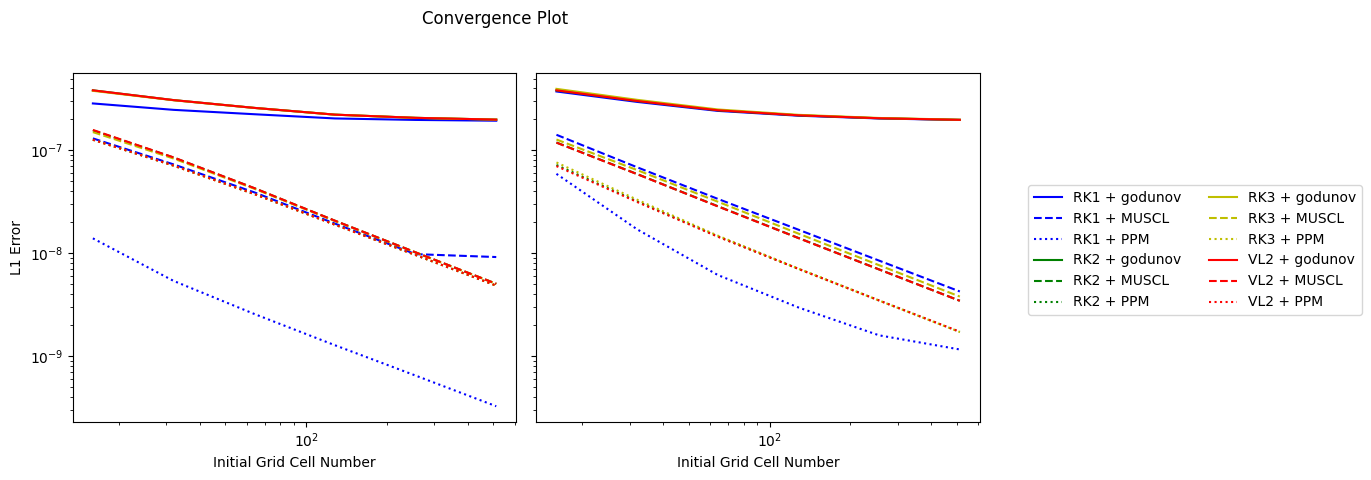

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
for temporal_method in temporal_methods:
	for method in reconstruction:
		ax[0].loglog(N, MSE[temporal_method]['old'][method], color=colormap[temporal_method], 
			   linestyle=linestyle_map[method], label=f'{temporal_method} + {method}')
		ax[1].loglog(N, MSE[temporal_method]['new'][method], color=colormap[temporal_method], 
			   linestyle=linestyle_map[method], label=f'{temporal_method} + {method}')

ax[0].set_ylabel("L1 Error")
ax[1].set_xlabel('Initial Grid Cell Number')
ax[0].set_xlabel('Initial Grid Cell Number')

all_handles, all_labels = [], []
handles1, labels1 = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()
by_label = dict(zip(labels1 + labels2, handles1 + handles2))
unique_labels = list(by_label.keys())
unique_handles = list(by_label.values())

fig.legend(unique_handles, unique_labels, loc='center', bbox_to_anchor=(1.2, 0.5), ncol=2)

fig.suptitle("Convergence Plot")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [37]:
from scipy.stats import linregress
for temporal_method in temporal_methods:
	for method in reconstruction:
			slope, intercept, r_value, p_value, std_err = linregress(np.log(N), np.log(MSE[temporal_method]['old'][method]))
			print(f'Old {temporal_method} {method}: {-np.round(slope, 5)}')
			slope, intercept, r_value, p_value, std_err = linregress(np.log(N), np.log(MSE[temporal_method]['new'][method]))
			print(f'New {temporal_method} {method}: {-np.round(slope, 5)}\n')

Old RK1 godunov: 0.11137
New RK1 godunov: 0.18154

Old RK1 MUSCL: 0.82399
New RK1 MUSCL: 1.00896

Old RK1 PPM: 1.06468
New RK1 PPM: 1.13264

Old RK2 godunov: 0.19026
New RK2 godunov: 0.18852

Old RK2 MUSCL: 0.99953
New RK2 MUSCL: 1.0228

Old RK2 PPM: 0.94799
New RK2 PPM: 1.07361

Old RK3 godunov: 0.18763
New RK3 godunov: 0.19733

Old RK3 MUSCL: 0.98905
New RK3 MUSCL: 1.01645

Old RK3 PPM: 0.94781
New RK3 PPM: 1.09127

Old VL2 godunov: 0.19026
New VL2 godunov: 0.18852

Old VL2 MUSCL: 1.00187
New VL2 MUSCL: 1.02178

Old VL2 PPM: 0.94825
New VL2 PPM: 1.06579

